<a href="https://colab.research.google.com/github/HGF-AA/Python/blob/main/Tweet_Location_Based_Visualization_Project(LDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview
This project involves analyzing a dataset of tweets to visualize the geographic distribution of tweet density across countries. The objective is to demonstrate data cleaning, transformation, and visualization using Python libraries like `pandas` and `plotly`.

### Goals:
1. Standardize location data from raw input.
2. Map tweets to corresponding countries using location patterns.
3. Create an interactive world map visualization with Plotly.



In [ ]:
# Import required libraries
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google.colab import files

# Download necessary NLTK data packages (first time setup)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Upload the dataset
uploaded = files.upload()  # This opens a file selection dialog

# Load the uploaded file into a Pandas DataFrame
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file
df = pd.read_csv(file_name)  # Adjust to read_excel() if it's an Excel file

# Display the first few rows of the dataset to check its structure
df.head()


Saving Updates tweet.csv to Updates tweet.csv


,ID,Timestamp,User,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,Text,text_tokenized,no_stopwords,text_lemmatized,text_stemmed,processed_text
0,1211798864656769025,2019-12-30 23:58:58+00:00,SipapuNM,NaN,0,1,0,"<a href=""http://instagram.com"" rel=""nofollow"">...","20 miles SE of Taos, NM",False,3342,258,looking for an exciting job where you can ski ...,"['looking', 'for', 'an', 'exciting', 'job', 'w...","['ski', 'free', '7', 'ski', 'areas', 'still', ...","['looking', 'for', 'an', 'exciting', 'job', 'w...","['look', 'for', 'an', 'excit', 'job', 'where',...",ski free ski area still winter season learn
1,1211797371853705220,2019-12-30 23:53:02+00:00,LorettaOD1,['job'],0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...",Arizona,False,63,129,hail in phoenix - no way! new opportunity at ...,"['hail', 'in', 'phoenix', 'no', 'way', 'new', ...","['hail', 'phoenix', 'freedom', 'possibly', 'n'...","['hail', 'in', 'phoenix', 'no', 'way', 'new', ...","['hail', 'in', 'phoenix', 'no', 'way', 'new', ...",hail phoenix way freedom possibly reconciliati...
2,1211795775363145728,2019-12-30 23:46:41+00:00,guajardo_celina,"['becomearacker', 'Rackspace', 'recruiting', '...",0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...","Texas, USA",False,19,50,rackspace is hiring! we are looking for nation...,"['rackspace', 'is', 'hiring', 'we', 'are', 'lo...","['rackspace', 'national', 'partner', 'manager'...","['rackspace', 'is', 'hiring', 'we', 'are', 'lo...","['rackspac', 'is', 'hire', 'we', 'are', 'look'...",rackspace national partner manager learn jobvi...
3,1211793355060981767,2019-12-30 23:37:04+00:00,SteveEckert_OTD,"['hiring', 'jobs', 'Nanuet']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...","Orange County, California",False,966,1569,we are #hiring administrative assistant in nan...,"['we', 'are', 'hiring', 'administrative', 'ass...","['administrative', 'assistant', 'nanuet', 'ny'...","['we', 'are', 'hiring', 'administrative', 'ass...","['we', 'are', 'hire', 'administr', 'assist', '...",administrative assistant nanuet ny nanuet
4,1211792689022349315,2019-12-30 23:34:25+00:00,HireLive,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251,we are #hiring family service counselor in irv...,"['we', 'are', 'hiring', 'family', 'service', '...","['family', 'service', 'counselor', 'irvine', '...","['we', 'are', 'hiring', 'family', 'service', '...","['we', 'are', 'hire', 'famili', 'servic', 'cou...",family service counselor irvine ca irvine


In [ ]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove hashtags
    text = re.sub(r'#\S+', '', text)
    # Remove special characters but keep spaces
    text = re.sub(r'[^\w\s]', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Collapse multiple spaces into a single space
    text = re.sub(r'\s+', ' ', text)
    # Strip leading and trailing spaces
    text = text.strip()
    return text

# Replace 'actual_column_name' with the actual name of the column in your DataFrame
actual_column_name = 'Text' # Example: Assuming the column name is 'review'
# If your column name is different, change 'review' to the correct name
df['cleaned_text'] = df[actual_column_name].astype(str).apply(clean_text)
df[[actual_column_name, 'cleaned_text']].head()  # Show a preview of cleaned data
# Changed 'text' to 'actual_column_name' to refer to the correct column

,Text,cleaned_text
0,looking for an exciting job where you can ski ...,looking for an exciting job where you can ski ...
1,hail in phoenix - no way! new opportunity at ...,hail in phoenix no way new opportunity at free...
2,rackspace is hiring! we are looking for nation...,rackspace is hiring we are looking for nationa...
3,we are #hiring administrative assistant in nan...,we are administrative assistant in nanuet ny
4,we are #hiring family service counselor in irv...,we are family service counselor in irvine ca


## Data Cleaning
This step involves standardizing location data to ensure consistent mapping to countries.

In [ ]:
# Import required libraries
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google.colab import files

# Download necessary NLTK data packages (first time setup)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')  # Add this line to download the missing data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Import required libraries
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google.colab import files

# Download necessary NLTK data packages (first time setup)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')  # Add this line to download the missing data

# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# --- The fix is inserted here ---
# Tokenize the 'cleaned_text' column and create a new 'tokens' column
df['tokens'] = df['cleaned_text'].apply(word_tokenize)
# --- End of fix ---

# Apply stemming to tokens
df['stemmed_tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

# Apply lemmatization to tokens
df['lemmatized_tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Display stemmed and lemmatized tokens for the first few rows
df[['tokens', 'stemmed_tokens', 'lemmatized_tokens']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,tokens,stemmed_tokens,lemmatized_tokens
0,"[looking, for, an, exciting, job, where, you, ...","[look, for, an, excit, job, where, you, can, s...","[looking, for, an, exciting, job, where, you, ..."
1,"[hail, in, phoenix, no, way, new, opportunity,...","[hail, in, phoenix, no, way, new, opportun, at...","[hail, in, phoenix, no, way, new, opportunity,..."
2,"[rackspace, is, hiring, we, are, looking, for,...","[rackspac, is, hire, we, are, look, for, natio...","[rackspace, is, hiring, we, are, looking, for,..."
3,"[we, are, administrative, assistant, in, nanue...","[we, are, administr, assist, in, nanuet, ny]","[we, are, administrative, assistant, in, nanue..."
4,"[we, are, family, service, counselor, in, irvi...","[we, are, famili, servic, counselor, in, irvin...","[we, are, family, service, counselor, in, irvi..."


In [ ]:
from google.colab import files

# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)

# Download the CSV file
files.download('cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

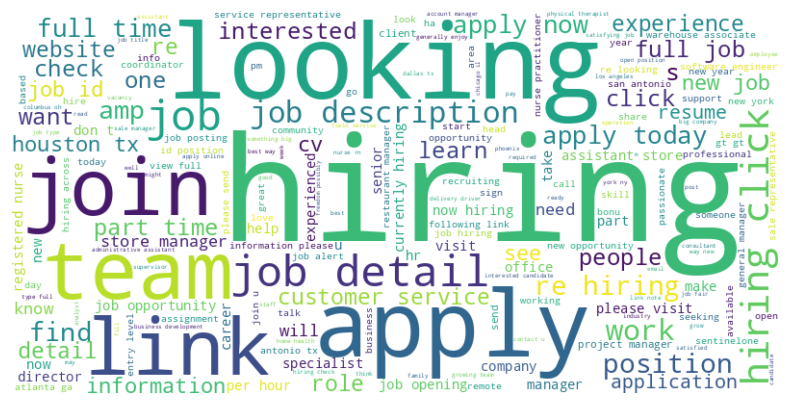

In [ ]:
# Combine all lemmatized tokens into a single string for word cloud generation
all_words = ' '.join([' '.join(tokens) for tokens in df['lemmatized_tokens']])

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


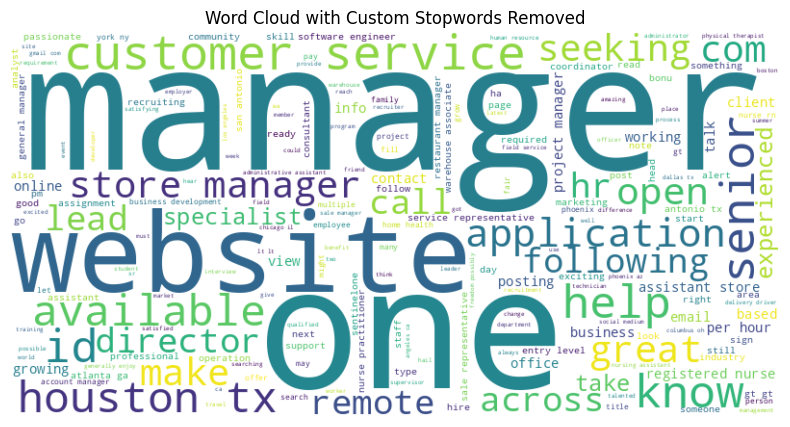

In [ ]:
# Import necessary libraries for the word cloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define default and custom stopwords
stop_words = set(stopwords.words('english'))
custom_stopwords = [
    'hiring', 'job', 'amp', 'big', 'best', 'come', 'would', 'like', 'find', 'need',
    'people', 'currently', 'company', 'learn', 'way', 'opportunity', 'team', 'detail',
    'link', 'click', 'visit', 'information', 'new', 'location', 'join', 'u', 'today',
    'join', 'position', 'full', 'send', 'description', 'experience', 'please', 'cv',
    'apply', 'looking', 'candidate', 'role', 'vacancy', 'work','part','time','year','check','resume','want','career','see','opening','interested','love','share','get'
]
# Add custom stopwords to the standard stop words
stop_words.update([word.lower() for word in custom_stopwords])

# Ensure 'lemmatized_tokens' exists (contains list of lemmatized words from text)
# Combine all lemmatized tokens into a single string for word cloud generation
filtered_words = ' '.join([' '.join(tokens) for tokens in df['lemmatized_tokens']])

# Generate and display the word cloud
wordcloud_filtered = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(filtered_words)

# Plot the new word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud with Custom Stopwords Removed")
plt.show()


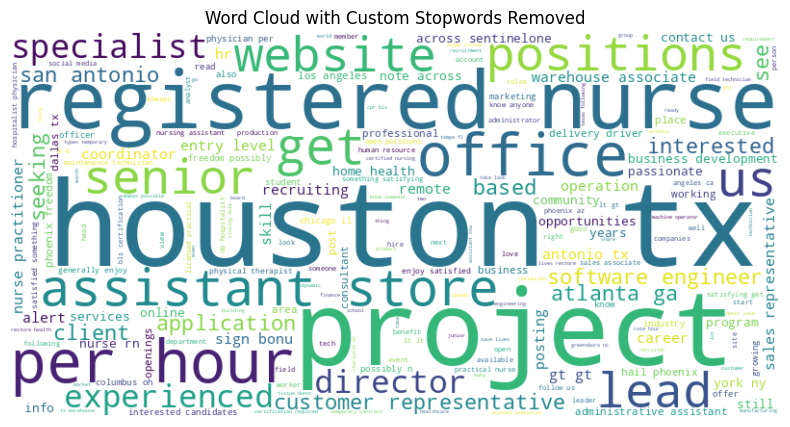

In [ ]:
# Import necessary libraries for the word cloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/cleaned_data.csv')  # Replace with the path to your dataset

# Define default and custom stopwords
stop_words = set(stopwords.words('english'))
custom_stopwords = [
    'hiring', 'job', 'amp', 'big', 'best', 'come', 'would', 'like', 'find', 'need',
    'people', 'currently', 'company', 'learn', 'way', 'opportunity', 'team', 'detail',
    'link', 'click', 'visit', 'information', 'new', 'location', 'join', 'u', 'today',
    'position', 'full', 'send', 'description', 'experience', 'please', 'cv', 'apply',
    'looking', 'candidate', 'role', 'vacancy', 'work', 'employment', 'part', 'time', 'year',
    'check', 'provide', 'support', 'service', 'assist', 'include', 'ensure', 'maintain',
    'help', 'exciting', 'great', 'amazing', 'excellent', 'rewarding', 'fantastic', 'week',
    'day', 'night', 'shift', 'city', 'state', 'country', 'usa', 'united states', 'nationwide',
    'team', 'organization', 'staff', 'manager', 'supervisor', 'employee','details', 'want','one','opening','jobs','com'
]

# Add custom stopwords to the standard stop words
stop_words.update([word.lower() for word in custom_stopwords])

# Apply stop words to the 'Clean_Text' column by tokenizing and filtering
df['Tokens'] = df['cleaned_text'].apply(lambda x: [word for word in str(x).split() if word.lower() not in stop_words])

# Combine all filtered tokens into a single string for word cloud generation
filtered_words = ' '.join([' '.join(tokens) for tokens in df['Tokens']])

# Generate and display the word cloud
wordcloud_filtered = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
).generate(filtered_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud with Custom Stopwords Removed")
plt.show()


In [ ]:
# Import necessary libraries for LDA
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv('/content/cleaned_data.csv')

# Initialize stop words and add custom job-related stopwords
stop_words = set(stopwords.words('english'))
stop_words.update([
       'hiring', 'job', 'amp', 'big', 'best', 'come', 'would', 'like', 'find', 'need',
    'people', 'currently', 'company', 'learn', 'way', 'opportunity', 'team', 'detail',
    'link', 'click', 'visit', 'information', 'new', 'join', 'u', 'today',
    'position', 'full', 'send', 'description', 'experience', 'please', 'cv',
    'apply', 'looking', 'candidate', 'role', 'vacancy', 'work', 'employment', 'part', 'time', 'year', 'check','open','website','apply','interest','interested','interested','see','customer service','customer','service','following','opening'
])

# Step 1: Tokenize and Filter Tokens
# Split the text into tokens, remove stopwords, and filter out single-character tokens
# Handle potential missing values (NaN) or float values in 'cleaned_text' column
df['tokens'] = df['cleaned_text'].apply(
    lambda text: [word for word in str(text).split() if word not in stop_words and len(word) > 1]
    if isinstance(text, str) else []  # Handle non-string values by assigning an empty list
)


# Step 2: Create Dictionary and Corpus
# Generate the dictionary and corpus from the filtered tokens
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Step 3: Train the LDA Model
# Set parameters: num_topics = 5 for 5 clusters, passes = 3 for 3 iterations over the corpus
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=3, random_state=42)

# Step 4: Display the Topics
# Print each topic along with the top words
for idx, topic in lda_model.print_topics(num_topics=5, num_words=10):
    print(f"Topic {idx + 1}: {topic}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: 0.035*"details" + 0.028*"rn" + 0.024*"travel" + 0.023*"hour" + 0.018*"nurse" + 0.013*"tx" + 0.012*"registered" + 0.011*"engineer" + 0.011*"technician" + 0.010*"warehouse"
Topic 2: 0.039*"us" + 0.020*"sales" + 0.019*"engineer" + 0.017*"location" + 0.015*"manager" + 0.012*"id" + 0.011*"senior" + 0.009*"il" + 0.009*"developer" + 0.009*"analyst"
Topic 3: 0.025*"manager" + 0.011*"assistant" + 0.009*"jobs" + 0.009*"know" + 0.008*"help" + 0.007*"career" + 0.007*"want" + 0.007*"great" + 0.007*"pm" + 0.006*"restaurant"
Topic 4: 0.021*"com" + 0.012*"positions" + 0.011*"remote" + 0.011*"view" + 0.011*"ca" + 0.011*"jobs" + 0.011*"hr" + 0.010*"email" + 0.010*"health" + 0.010*"opportunities"
Topic 5: 0.019*"get" + 0.017*"physician" + 0.016*"ny" + 0.016*"per" + 0.014*"tx" + 0.012*"jobs" + 0.012*"therapist" + 0.011*"assistant" + 0.011*"one" + 0.010*"ob"


In [ ]:
# Import necessary libraries for LDA
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv('/content/cleaned_data.csv')

# Initialize stop words and add custom job-related stopwords
stop_words = set(stopwords.words('english'))
stop_words.update([
       'hiring', 'job', 'amp', 'big', 'best', 'come', 'would', 'like', 'find', 'need',
    'people', 'currently', 'company', 'learn', 'way', 'opportunity', 'team', 'detail',
    'link', 'click', 'visit', 'information', 'new', 'join', 'u', 'today',
    'position', 'full', 'send', 'description', 'experience', 'please', 'cv',
    'apply', 'looking', 'candidate', 'role', 'vacancy', 'work', 'employment', 'part', 'time', 'year', 'check','open','website','apply','interest','interested','interested','see','customer service','customer','service','following','opening'
])

# Step 1: Tokenize and Filter Tokens
# Split the text into tokens, remove stopwords, and filter out single-character tokens
# Handle potential missing values (NaN) or float values in 'cleaned_text' column
df['tokens'] = df['cleaned_text'].apply(
    lambda text: [word for word in str(text).split() if word not in stop_words and len(word) > 1]
    if isinstance(text, str) else []  # Handle non-string values by assigning an empty list
)


# Step 2: Create Dictionary and Corpus
# Generate the dictionary and corpus from the filtered tokens
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Step 3: Train the LDA Model
# Set parameters: num_topics = 5 for 5 clusters, passes = 3 for 3 iterations over the corpus
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=3, random_state=42)

# Step 4: Display the Topics
# Print each topic along with the top words
for idx, topic in lda_model.print_topics(num_topics=10, num_words=10):
    print(f"Topic {idx + 1}: {topic}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: 0.072*"details" + 0.024*"nurse" + 0.020*"warehouse" + 0.019*"day" + 0.018*"associate" + 0.017*"love" + 0.017*"licensed" + 0.015*"shift" + 0.014*"reach" + 0.014*"passionate"
Topic 2: 0.048*"sales" + 0.034*"manager" + 0.019*"assignment" + 0.018*"level" + 0.018*"representative" + 0.018*"il" + 0.017*"marketing" + 0.016*"ny" + 0.016*"executive" + 0.015*"york"
Topic 3: 0.076*"manager" + 0.046*"tx" + 0.034*"per" + 0.034*"hour" + 0.028*"remote" + 0.028*"assistant" + 0.027*"physician" + 0.021*"houston" + 0.017*"project" + 0.016*"restaurant"
Topic 4: 0.098*"engineer" + 0.028*"senior" + 0.026*"ob" + 0.025*"software" + 0.025*"hospitalist" + 0.024*"co" + 0.019*"analyst" + 0.019*"developer" + 0.015*"az" + 0.014*"sr"
Topic 5: 0.026*"next" + 0.020*"supervisor" + 0.018*"health" + 0.016*"uk" + 0.015*"st" + 0.015*"may" + 0.015*"read" + 0.014*"production" + 0.012*"mo" + 0.012*"city"
Topic 6: 0.020*"gt" + 0.020*"years" + 0.018*"april" + 0.015*"business" + 0.013*"summer" + 0.011*"candidates" + 0.01

In [ ]:
# Import necessary libraries for LDA
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv('/content/cleaned_data.csv')

# Initialize stop words and add custom job-related stopwords
stop_words = set(stopwords.words('english'))
stop_words.update([
    'hiring', 'job', 'amp', 'big', 'best', 'come', 'would', 'like', 'find', 'need',
    'people', 'currently', 'company', 'learn', 'way', 'opportunity', 'team', 'detail',
    'link', 'click', 'visit', 'information', 'new', 'join', 'u', 'today',
    'position', 'full', 'send', 'description', 'experience', 'please', 'cv',
    'apply', 'looking', 'candidate', 'role', 'vacancy', 'work', 'employment', 'part', 'time', 'year', 'check',
    'open', 'website', 'apply', 'interest', 'interested', 'see', 'customer service', 'customer', 'service',
    'following', 'opening'
])

# Step 1: Tokenize and Filter Tokens
df['tokens'] = df['cleaned_text'].apply(
    lambda text: [word for word in str(text).split() if word not in stop_words and len(word) > 1]
    if isinstance(text, str) else []
)

# Step 2: Create Dictionary and Corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Step 3: Train the Initial LDA Model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=3, random_state=42)

# Step 4: Identify Documents Most Related to Topic 7
topic_threshold = 0.5
topic_index = 6  # Zero-based index for Topic 7

# Filter documents where Topic 7 has a high contribution
# Check if the topic index is within the range of topics for the document
topic_7_docs = [
    df['tokens'][i] for i, row in enumerate(lda_model[corpus])
    if len(row) > topic_index and row[topic_index][1] >= topic_threshold # Check if the topic index is valid for this document
]

# Step 5: Create New Dictionary and Corpus for Topic 7
topic_7_dictionary = corpora.Dictionary(topic_7_docs)
topic_7_corpus = [topic_7_dictionary.doc2bow(text) for text in topic_7_docs]

# Step 6: Train a New LDA Model on Topic 7 Documents
lda_model_topic_7 = LdaModel(corpus=topic_7_corpus, id2word=topic_7_dictionary, num_topics=5, passes=5, random_state=42)

# Step 7: Display the Subtopics
for idx, topic in lda_model_topic_7.print_topics(num_topics=5, num_words=10):
    print(f"Subtopic {idx + 1}: {topic}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Subtopic 1: 0.029*"jobs" + 0.019*"roles" + 0.015*"openings" + 0.015*"difference" + 0.014*"career" + 0.013*"make" + 0.012*"exciting" + 0.012*"great" + 0.011*"manager" + 0.011*"want"
Subtopic 2: 0.028*"mi" + 0.018*"jobs" + 0.015*"positions" + 0.013*"talented" + 0.011*"page" + 0.010*"careers" + 0.010*"awesome" + 0.008*"available" + 0.007*"detroit" + 0.007*"sector"
Subtopic 3: 0.022*"know" + 0.018*"anyone" + 0.016*"dm" + 0.014*"jobs" + 0.014*"servicenow" + 0.013*"working" + 0.012*"want" + 0.011*"engineer" + 0.011*"senior" + 0.009*"challenges"
Subtopic 4: 0.041*"opportunities" + 0.017*"available" + 0.013*"growing" + 0.010*"help" + 0.010*"still" + 0.010*"services" + 0.009*"jobs" + 0.009*"senior" + 0.008*"global" + 0.008*"career"
Subtopic 5: 0.039*"opportunities" + 0.025*"look" + 0.022*"right" + 0.022*"amazing" + 0.018*"take" + 0.017*"follow" + 0.017*"futuresandcareers" + 0.017*"heard" + 0.013*"great" + 0.011*"openings"


In [ ]:
# Import necessary libraries for filtering and saving
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
import nltk

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv('/content/cleaned_data.csv')

# Initialize stop words and add custom job-related stopwords
stop_words = set(stopwords.words('english'))
stop_words.update([
    'hiring', 'job', 'amp', 'big', 'best', 'come', 'would', 'like', 'find', 'need',
    'people', 'currently', 'company', 'learn', 'way', 'opportunity', 'team', 'detail',
    'link', 'click', 'visit', 'information', 'new', 'join', 'u', 'today',
    'position', 'full', 'send', 'description', 'experience', 'please', 'cv',
    'apply', 'looking', 'candidate', 'role', 'vacancy', 'work', 'employment', 'part', 'time', 'year', 'check',
    'open', 'website', 'apply', 'interest', 'interested', 'see', 'customer service', 'customer', 'service',
    'following', 'opening'
])

# Step 1: Tokenize and filter tokens based on stop words and single-character tokens
df['tokens'] = df['cleaned_text'].apply(
    lambda text: [word for word in str(text).split() if word not in stop_words and len(word) > 1]
    if isinstance(text, str) else []
)

# Step 2: Create Dictionary and Corpus for the Initial LDA Model
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Step 3: Train the Initial LDA Model with 10 Topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=3, random_state=42)

# Step 4: Identify Documents Most Related to Topic 7
topic_threshold = 0.5  # Set threshold for considering a document as primarily about Topic 7
topic_index = 6        # Zero-based index for Topic 7

# Filter documents where Topic 7 has a high contribution
topic_7_docs_indices = [
    i for i, row in enumerate(lda_model[corpus])
    if len(row) > topic_index and row[topic_index][1] >= topic_threshold
]

# Create a DataFrame for Topic 7 documents
topic_7_df = df.iloc[topic_7_docs_indices].copy()

# Step 5: Create Dictionary and Corpus for Topic 7 Documents and Train Subtopic Model
topic_7_dictionary = corpora.Dictionary(topic_7_df['tokens'])
topic_7_corpus = [topic_7_dictionary.doc2bow(text) for text in topic_7_df['tokens']]

# Train a New LDA Model on Topic 7 Documents to identify subtopics
lda_model_topic_7 = LdaModel(corpus=topic_7_corpus, id2word=topic_7_dictionary, num_topics=5, passes=5, random_state=42)

# Step 6: Identify Keywords for Subtopic 1
subtopic_1_keywords = [word for word, _ in lda_model_topic_7.show_topic(0, topn=10)]  # Get top words in Subtopic 1

# Step 7: Further Filter Topic 7 Documents to Include Only Those Relevant to Subtopic 1
# Keep documents with any keyword from Subtopic 1's top words
subtopic_1_docs_indices = [
    i for i, tokens in enumerate(topic_7_df['tokens'])
    if any(keyword in tokens for keyword in subtopic_1_keywords)
]

# Final DataFrame for Subtopic 1 Documents
subtopic_1_df = topic_7_df.iloc[subtopic_1_docs_indices]

# Step 8: Save the Filtered Data to a CSV File for Download
filtered_file_path = '/content/subtopic_1_nurse_jobs.csv'
subtopic_1_df.to_csv(filtered_file_path, index=False)

# Provide a download link for the file (for Google Colab or Jupyter Notebook)
print(f"Filtered dataset for Subtopic 1 saved to: {filtered_file_path}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Filtered dataset for Subtopic 1 saved to: /content/subtopic_1_nurse_jobs.csv


In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import re
from collections import Counter

# Define the dataset path
dataset_path = "/content/subtopic_1_nurse_jobs.csv"

# Try to load the dataset directly
try:
    # Load the dataset
    data = pd.read_csv(dataset_path)
    print(f"Dataset loaded successfully from {dataset_path}.")
except FileNotFoundError:
    print(f"Error: Dataset not found at {dataset_path}. Please make sure the file exists at this location.")
    # Exit the script or handle the error as needed
    exit()

# Step 1: Extract the 'Location' column and standardize locations
locations = data['Location'].dropna().str.lower().str.strip()  # Lowercase and remove whitespace

# Normalize common patterns: spacing around commas, inconsistent state abbreviations, etc.
cleaned_locations = locations.str.replace(r'\s*,\s*', ',', regex=True).str.strip()

# Step 2: Define standard location patterns
location_patterns = {
    r"new york city|nyc": "New York, NY",
    r"los angeles|la": "Los Angeles, CA",
    r"san francisco|sf|sfo": "San Francisco, CA",
    r"chicago": "Chicago, IL",
    r"atlanta": "Atlanta, GA",
    r"houston": "Houston, TX",
    r"dallas": "Dallas, TX",
    r"miami": "Miami, FL",
    r"seattle": "Seattle, WA",
    r"denver": "Denver, CO",
    r"boston": "Boston, MA",
    r"phoenix": "Phoenix, AZ",
}

# Apply the location patterns to standardize names
for pattern, standardized_location in location_patterns.items():
    cleaned_locations = cleaned_locations.str.replace(pattern, standardized_location, regex=True)

# Define U.S. state abbreviations and names
us_states = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Create a reverse mapping of state names and abbreviations for easy look-up
state_abbrev = {state.lower(): abbrev for abbrev, state in us_states.items()}
state_abbrev.update({abbrev.lower(): abbrev for abbrev in us_states.keys()})  # Add abbreviations directly

# Additional city/state mapping for common entries
city_patterns = {
    r"\blos angeles\b|la\b": "CA",
    r"\batlanta\b": "GA",
    r"\bnew york\b|nyc\b": "NY",
    r"\bchicago\b": "IL",
    r"\bmiami\b": "FL",
    r"\bdallas\b": "TX",
    r"\bseattle\b": "WA",
    r"\bdenver\b": "CO",
    r"\bboston\b": "MA",
    r"\bhouston\b": "TX",
    r"\bsan francisco\b|sf\b|sfo\b": "CA",
    r"\bphoenix\b": "AZ",
    r"\bsacramento\b": "CA",
    r"\bsan diego\b": "CA"
}

# Create a DataFrame to count occurrences of locations
location_df = pd.DataFrame({'Location': cleaned_locations})
location_df['Frequency'] = location_df.groupby('Location')['Location'].transform('count')
location_df = location_df.drop_duplicates().reset_index(drop=True)

# Map city patterns first, then use state name/abbreviation mappings
state_counts = Counter()
for location in location_df['Location']:
    matched = False

    # Check against city patterns
    for pattern, state in city_patterns.items():
        if re.search(pattern, location):
            state_counts[state] += location_df.loc[location_df['Location'] == location, 'Frequency'].values[0]
            matched = True
            break

    # If not matched, check for state name or abbreviation
    if not matched:
        # Check for entries like "irvine ca" where no comma exists
        city_state_pattern = re.match(r"(.+?)\s+([a-z]{2})$", location)
        if city_state_pattern:
            city, abbrev = city_state_pattern.groups()
            if abbrev in state_abbrev:  # Only count valid states
                state_counts[state_abbrev[abbrev]] += location_df.loc[location_df['Location'] == location, 'Frequency'].values[0]
                matched = True

        # Check if location is just a state name or abbreviation
        if not matched and location in state_abbrev:
            state = state_abbrev[location]
            state_counts[state] += location_df.loc[location_df['Location'] == location, 'Frequency'].values[0]

# Convert the results to a DataFrame for plotting
state_counts_df = pd.DataFrame(state_counts.items(), columns=['State', 'Frequency'])

# Step 2: Create a bubble map over the U.S. with Plotly
fig = px.scatter_geo(
    state_counts_df,
    locations="State",
    locationmode="USA-states",
    size="Frequency",
    size_max=27,  # Adjust the maximum bubble size (increase from default to make bubbles bigger)
    scope="usa",
    title="Density of Nurse Job Mentions by State (Bubble Map)",
    color_discrete_sequence=["blue"],  # Uniform bubble color
    hover_name="State",
    hover_data={"Frequency": True, "State": False}
)

# Customize bubble and map appearance
fig.update_geos(showlakes=True, lakecolor="LightBlue")
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Dataset loaded successfully from /content/subtopic_1_nurse_jobs.csv.


In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import re
from collections import Counter

# Define the dataset path
dataset_path = '/content/Job_Tweets.csv'

# Load the dataset
try:
    data = pd.read_csv(dataset_path)
    print(f"Dataset loaded successfully from {dataset_path}.")
except FileNotFoundError:
    print(f"Error: Dataset not found at {dataset_path}. Please ensure the file exists at this location.")
    exit()  # Exit the script if the file is not found

# Step 1: Extract the 'Location' column and standardize locations
locations = data['Location'].dropna().str.lower().str.strip()  # Lowercase and remove whitespace

# Normalize common patterns: remove unnecessary whitespace, handle cities that imply countries, etc.
cleaned_locations = locations.str.replace(r'\s*,\s*', ',', regex=True).str.strip()

# Step 2: Define common city and country patterns for standardizing location names
country_patterns = {
    r"new york city|nyc": "United States",
    r"los angeles|la": "United States",
    r"san francisco|sf|sfo": "United States",
    r"chicago": "United States",
    r"london": "United Kingdom",
    r"toronto": "Canada",
    r"vancouver": "Canada",
    r"paris": "France",
    r"berlin": "Germany",
    r"tokyo": "Japan",
    r"sydney": "Australia",
    r"melbourne": "Australia",
    r"mumbai": "India",
    r"delhi": "India",
    r"bangalore": "India",
    r"singapore": "Singapore",
    r"seoul": "South Korea",
    r"shanghai": "China",
    # Add other major world cities if needed
}

# Step 3: Standardize city names to corresponding countries
for pattern, country in country_patterns.items():
    cleaned_locations = cleaned_locations.str.replace(pattern, country, regex=True)

# Define a dictionary with recognized country codes
country_codes = {
    'United States': 'USA', 'United Kingdom': 'GBR', 'Canada': 'CAN', 'France': 'FRA',
    'Germany': 'DEU', 'Japan': 'JPN', 'Australia': 'AUS', 'India': 'IND', 'Singapore': 'SGP',
    'South Korea': 'KOR', 'China': 'CHN', 'Brazil': 'BRA', 'Russia': 'RUS', 'Mexico': 'MEX',
    'Italy': 'ITA', 'Spain': 'ESP', 'Netherlands': 'NLD', 'Sweden': 'SWE', 'Switzerland': 'CHE',
    'Saudi Arabia': 'SAU', 'Turkey': 'TUR', 'South Africa': 'ZAF'
    # Add other countries as needed
}

# Step 4: Map each location to a country
country_counts = Counter()
for location in cleaned_locations:
    for country_name, code in country_codes.items():
        if country_name.lower() in location:
            country_counts[code] += 1
            break

# Convert the counts to a DataFrame
country_counts_df = pd.DataFrame(country_counts.items(), columns=['Country Code', 'Frequency'])

# Step 5: Plot the interactive world map with 'Viridis' color scale and Miller projection
fig = px.choropleth(
    country_counts_df,
    locations='Country Code',
    color='Frequency',
    color_continuous_scale="Viridis",  # Subtle color scale with slightly more color variation
    title="Tweet Density by Country",
    labels={'Frequency': 'Tweet Count'}
)

# Update layout with Miller projection for a balanced world map view
fig.update_geos(
    projection_type="miller",
    showcoastlines=True,
    coastlinecolor="Gray"
)
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Error: Dataset not found at /content/Job_Tweets.csv. Please ensure the file exists at this location.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



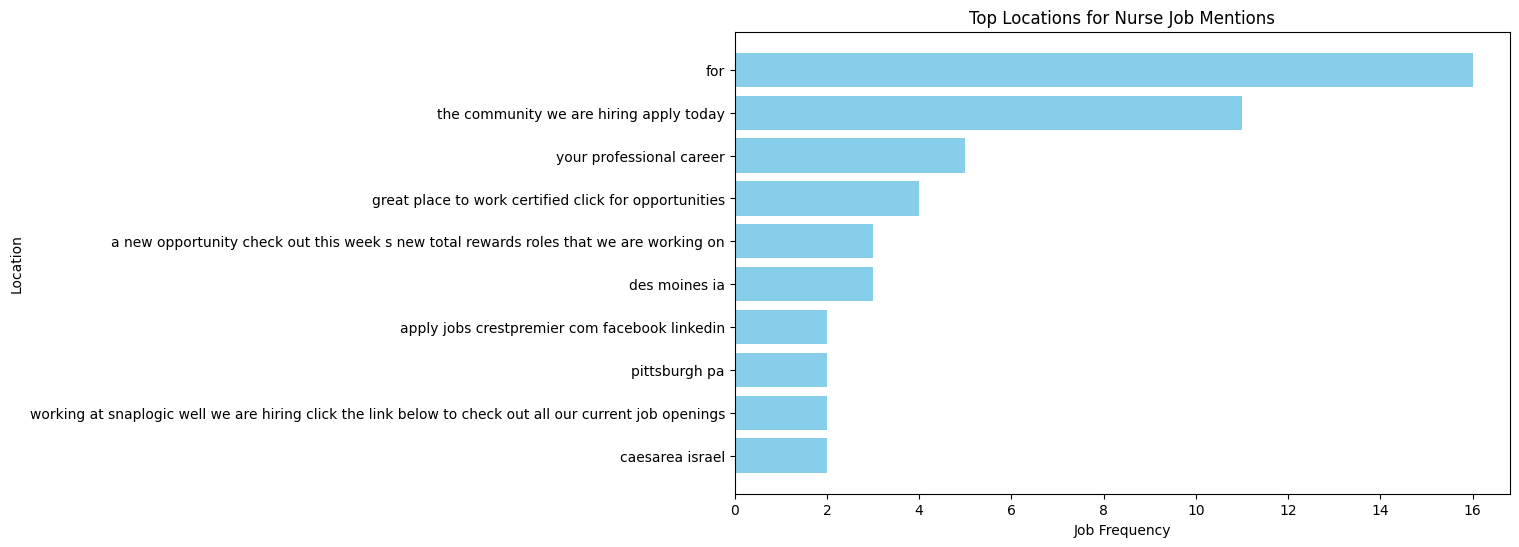

In [ ]:
# Import necessary libraries
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# Load the filtered dataset based on Topic 7 and Subtopic 1
filtered_data_path = '/content/subtopic_1_nurse_jobs.csv'
filtered_data = pd.read_csv(filtered_data_path)

# Step 1: Extract location information from 'cleaned_text' based on patterns like "in [Location]"
location_pattern = r"\bin\s+([A-Za-z\s]+)"
locations = []

for text in filtered_data['cleaned_text']:
    found_locations = re.findall(location_pattern, text)
    locations.extend([loc.strip() for loc in found_locations])

# Count occurrences of each location
location_counts = Counter(locations)
location_df = pd.DataFrame(location_counts.items(), columns=['Location', 'Frequency'])

# Sort locations by frequency and get the top 10
top_locations_df = location_df.sort_values(by='Frequency', ascending=False).head(10)

# Step 2: Plotting the top locations as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_locations_df['Location'], top_locations_df['Frequency'], color='skyblue')
plt.xlabel('Job Frequency')
plt.ylabel('Location')
plt.title('Top Locations for Nurse Job Mentions')
plt.gca().invert_yaxis()  # Highest count at the top
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import re
from collections import Counter
import plotly.express as px

# Load the dataset
filtered_data_path = '/content/subtopic_1_nurse_jobs.csv'
filtered_data = pd.read_csv(filtered_data_path)

# Step 1: Extract location information
location_pattern = r"\bin\s+([A-Za-z\s]+(?:,\s*[A-Za-z]{2})?)"
locations = []

for text in filtered_data['cleaned_text'].dropna():
    found_locations = re.findall(location_pattern, text)
    locations.extend([loc.strip() for loc in found_locations])

# Count occurrences of each location
location_counts = Counter(locations)
location_df = pd.DataFrame(location_counts.items(), columns=['Location', 'Frequency'])

# Normalize location names
location_df['Location'] = location_df['Location'].str.lower().str.strip()

# U.S. state abbreviations and names
us_states = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Reverse mapping for state names and abbreviations
state_abbrev = {state.lower(): abbrev for abbrev, state in us_states.items()}
state_abbrev.update({abbrev.lower(): abbrev for abbrev in us_states.keys()})

# City to state mappings
city_patterns = {
    r"\blos angeles\b|la\b": "CA", r"\batlanta\b": "GA", r"\bnew york\b|nyc\b": "NY",
    r"\bchicago\b": "IL", r"\bmiami\b": "FL", r"\bdallas\b": "TX", r"\bseattle\b": "WA",
    r"\bdenver\b": "CO", r"\bboston\b": "MA", r"\bhouston\b": "TX", r"\bsan francisco\b|sf\b|sfo\b": "CA",
    r"\bphoenix\b": "AZ", r"\bsacramento\b": "CA", r"\bsan diego\b": "CA"
}

# Map cities and states
state_counts = Counter()

for _, row in location_df.iterrows():
    location = row['Location']
    frequency = row['Frequency']
    matched = False

    # Match against city patterns
    for pattern, state in city_patterns.items():
        if re.search(pattern, location):
            state_counts[state] += frequency
            matched = True
            break

    # Match state names or abbreviations
    if not matched:
        if location in state_abbrev:
            state_counts[state_abbrev[location]] += frequency

# Convert state counts to DataFrame
state_counts_df = pd.DataFrame(state_counts.items(), columns=['State', 'Frequency'])

# Plotting the map
fig = px.choropleth(
    state_counts_df,
    locations='State',
    locationmode='USA-states',
    color='Frequency',
    color_continuous_scale='Blues',
    scope='usa',
    title='Density of Nurse Job Mentions by State'
)
fig.update_geos(showlakes=True, lakecolor='LightBlue')
fig.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import re
from collections import Counter

# Define the dataset path
dataset_path = "/content/subtopic_1_nurse_jobs.csv"

# Try to load the dataset directly
try:
    # Load the dataset
    data = pd.read_csv(dataset_path)
    print(f"Dataset loaded successfully from {dataset_path}.")
except FileNotFoundError:
    print(f"Error: Dataset not found at {dataset_path}. Please make sure the file exists at this location.")
    # Exit the script or handle the error as needed
    exit()

# Step 1: Extract the 'Location' column and standardize locations
locations = data['Location'].dropna().str.lower().str.strip()  # Lowercase and remove whitespace

# Normalize common patterns: spacing around commas, inconsistent state abbreviations, etc.
cleaned_locations = locations.str.replace(r'\s*,\s*', ',', regex=True).str.strip()

# Step 2: Define standard location patterns
location_patterns = {
    r"new york city|nyc": "New York, NY",
    r"los angeles|la": "Los Angeles, CA",
    r"san francisco|sf|sfo": "San Francisco, CA",
    r"chicago": "Chicago, IL",
    r"atlanta": "Atlanta, GA",
    r"houston": "Houston, TX",
    r"dallas": "Dallas, TX",
    r"miami": "Miami, FL",
    r"seattle": "Seattle, WA",
    r"denver": "Denver, CO",
    r"boston": "Boston, MA",
    r"phoenix": "Phoenix, AZ",
}

# Apply the location patterns to standardize names
for pattern, standardized_location in location_patterns.items():
    cleaned_locations = cleaned_locations.str.replace(pattern, standardized_location, regex=True)

# Define U.S. state abbreviations and names
us_states = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Create a reverse mapping of state names and abbreviations for easy look-up
state_abbrev = {state.lower(): abbrev for abbrev, state in us_states.items()}
state_abbrev.update({abbrev.lower(): abbrev for abbrev in us_states.keys()})  # Add abbreviations directly

# Additional city/state mapping for common entries
city_patterns = {
    r"\blos angeles\b|la\b": "CA",
    r"\batlanta\b": "GA",
    r"\bnew york\b|nyc\b": "NY",
    r"\bchicago\b": "IL",
    r"\bmiami\b": "FL",
    r"\bdallas\b": "TX",
    r"\bseattle\b": "WA",
    r"\bdenver\b": "CO",
    r"\bboston\b": "MA",
    r"\bhouston\b": "TX",
    r"\bsan francisco\b|sf\b|sfo\b": "CA",
    r"\bphoenix\b": "AZ",
    r"\bsacramento\b": "CA",
    r"\bsan diego\b": "CA"
}

# Create a DataFrame to count occurrences of locations
location_df = pd.DataFrame({'Location': cleaned_locations})
location_df['Frequency'] = location_df.groupby('Location')['Location'].transform('count')
location_df = location_df.drop_duplicates().reset_index(drop=True)

# Map city patterns first, then use state name/abbreviation mappings
state_counts = Counter()
for location in location_df['Location']:
    matched = False

    # Check against city patterns
    for pattern, state in city_patterns.items():
        if re.search(pattern, location):
            state_counts[state] += location_df.loc[location_df['Location'] == location, 'Frequency'].values[0]
            matched = True
            break

    # If not matched, check for state name or abbreviation
    if not matched:
        # Check for entries like "irvine ca" where no comma exists
        city_state_pattern = re.match(r"(.+?)\s+([a-z]{2})$", location)
        if city_state_pattern:
            city, abbrev = city_state_pattern.groups()
            if abbrev in state_abbrev:  # Only count valid states
                state_counts[state_abbrev[abbrev]] += location_df.loc[location_df['Location'] == location, 'Frequency'].values[0]
                matched = True

        # Check if location is just a state name or abbreviation
        if not matched and location in state_abbrev:
            state = state_abbrev[location]
            state_counts[state] += location_df.loc[location_df['Location'] == location, 'Frequency'].values[0]

# Convert the results to a DataFrame for plotting
state_counts_df = pd.DataFrame(state_counts.items(), columns=['State', 'Frequency'])

# Step 2: Create a bubble map over the U.S. with Plotly
fig = px.scatter_geo(
    state_counts_df,
    locations="State",
    locationmode="USA-states",
    size="Frequency",
    size_max=27,  # Adjust the maximum bubble size (increase from default to make bubbles bigger)
    scope="usa",
    title="Density of Nurse Job Mentions by State (Bubble Map)",
    color_discrete_sequence=["blue"],  # Uniform bubble color
    hover_name="State",
    hover_data={"Frequency": True, "State": False}
)

# Customize bubble and map appearance
fig.update_geos(showlakes=True, lakecolor="LightBlue")
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()


Dataset loaded successfully from /content/subtopic_1_nurse_jobs.csv.


In [ ]:
# Import necessary libraries
import pandas as pd
import re
from collections import Counter
import plotly.express as px

# Load the filtered dataset based on Topic 7 and Subtopic 1
filtered_data_path = '/content/subtopic_1_nurse_jobs.csv'
filtered_data = pd.read_csv(filtered_data_path)

# Step 1: Extract location information from 'cleaned_text' based on patterns like "in [Location]"
location_pattern = r"\bin\s+([A-Za-z\s]+(?:[A-Za-z]{2})?)"
locations = []

# Capture city and state names (with or without commas)
for text in filtered_data['cleaned_text'].dropna():  # Drop NaN values for clean processing
    found_locations = re.findall(location_pattern, text)
    locations.extend([loc.strip() for loc in found_locations])

# Count occurrences of each location
location_counts = Counter(locations)
location_df = pd.DataFrame(location_counts.items(), columns=['Location', 'Frequency'])

# Normalize location names to lowercase and remove extra spaces
location_df['Location'] = location_df['Location'].str.lower().str.strip()

# Define U.S. state abbreviations and names
us_states = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Create a reverse mapping of state names and abbreviations for easy look-up
state_abbrev = {state.lower(): abbrev for abbrev, state in us_states.items()}
state_abbrev.update({abbrev.lower(): abbrev for abbrev in us_states.keys()})  # Add abbreviations directly

# Additional city/state mapping for common entries
city_patterns = {
    r"\blos angeles\b|la\b": "CA",
    r"\batlanta\b": "GA",
    r"\bnew york\b|nyc\b": "NY",
    r"\bchicago\b": "IL",
    r"\bmiami\b": "FL",
    r"\bdallas\b": "TX",
    r"\bseattle\b": "WA",
    r"\bdenver\b": "CO",
    r"\bboston\b": "MA",
    r"\bhouston\b": "TX",
    r"\bsan francisco\b|sf\b|sfo\b": "CA",
    r"\bphoenix\b": "AZ",
    r"\bsacramento\b": "CA",
    r"\bsan diego\b": "CA"
}

# Map city patterns first, then use state name/abbreviation mappings
state_counts = Counter()
for location in location_df['Location']:
    matched = False

    # Check against city patterns
    for pattern, state in city_patterns.items():
        if re.search(pattern, location):
            state_counts[state] += location_df.loc[location_df['Location'] == location, 'Frequency'].values[0]
            matched = True
            break

    # If not matched, check for state name or abbreviation
    if not matched:
        # Check for entries like "irvine ca" where no comma exists
        city_state_pattern = re.match(r"(.+?)\s+([a-z]{2})$", location)
        if city_state_pattern:
            city, abbrev = city_state_pattern.groups()
            if abbrev in state_abbrev:  # Only count valid states
                state_counts[state_abbrev[abbrev]] += location_df.loc[location_df['Location'] == location, 'Frequency'].values[0]
                matched = True

        # Check if location is just a state name or abbreviation
        if not matched and location in state_abbrev:
            state = state_abbrev[location]
            state_counts[state] += location_df.loc[location_df['Location'] == location, 'Frequency'].values[0]

# Convert the results to a DataFrame for plotting
state_counts_df = pd.DataFrame(state_counts.items(), columns=['State', 'Frequency'])

# Step 2: Create a bubble map over the U.S. with Plotly
fig = px.scatter_geo(
    state_counts_df,
    locations="State",
    locationmode="USA-states",
    size="Frequency",
    size_max=26,  # Bubble size
    scope="usa",
    title="Density of Nurse Job Mentions by State (Bubble Map)",
    color_discrete_sequence=["blue"],  # Uniform bubble color
    hover_name="State",
    hover_data={"Frequency": True, "State": False}
)

# Customize the map with a slightly darker land and lake color without changing the background
fig.update_geos(
    showlakes=True, lakecolor="rgb(173, 216, 230)",   # Light blue lakes
    landcolor="rgb(220, 220, 220)",                   # Light gray land color
    coastlinecolor="DarkSlateGrey",                   # Darker coastlines for contrast
    showcoastlines=True,
    showland=True
)
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import re
from collections import Counter
import plotly.express as px

# Load the filtered dataset based on Topic 7 and Subtopic 1
filtered_data_path = '/content/subtopic_1_nurse_jobs.csv'
filtered_data = pd.read_csv(filtered_data_path)

# U.S. state populations (based on the 2020 Census)
state_population = {
    'AL': 5024279, 'AK': 733391, 'AZ': 7151502, 'AR': 3011524, 'CA': 39538223,
    'CO': 5773714, 'CT': 3605944, 'DE': 989948, 'FL': 21538187, 'GA': 10711908,
    'HI': 1455271, 'ID': 1839106, 'IL': 12812508, 'IN': 6785528, 'IA': 3190369,
    'KS': 2937880, 'KY': 4505836, 'LA': 4657757, 'ME': 1362359, 'MD': 6177224,
    'MA': 7029917, 'MI': 10077331, 'MN': 5706494, 'MS': 2961279, 'MO': 6154913,
    'MT': 1084225, 'NE': 1961504, 'NV': 3104614, 'NH': 1377529, 'NJ': 9288994,
    'NM': 2117522, 'NY': 20201249, 'NC': 10439388, 'ND': 779094, 'OH': 11799448,
    'OK': 3959353, 'OR': 4237256, 'PA': 13002700, 'RI': 1097379, 'SC': 5118425,
    'SD': 886667, 'TN': 6910840, 'TX': 29145505, 'UT': 3271616, 'VT': 643077,
    'VA': 8631393, 'WA': 7693612, 'WV': 1793716, 'WI': 5893718, 'WY': 576851
}

# Step 1: Extract location information from 'cleaned_text' based on patterns like "in [Location]"
location_pattern = r"\bin\s+([A-Za-z\s]+(?:[A-Za-z]{2})?)"
locations = []

# Capture city and state names (with or without commas)
for text in filtered_data['cleaned_text'].dropna():  # Drop NaN values for clean processing
    found_locations = re.findall(location_pattern, text)
    locations.extend([loc.strip() for loc in found_locations])

# Count occurrences of each location
location_counts = Counter(locations)
location_df = pd.DataFrame(location_counts.items(), columns=['Location', 'Frequency'])

# Normalize location names to lowercase and remove extra spaces
location_df['Location'] = location_df['Location'].str.lower().str.strip()

# Define U.S. state abbreviations and names
us_states = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Create a reverse mapping of state names and abbreviations for easy look-up
state_abbrev = {state.lower(): abbrev for abbrev, state in us_states.items()}
state_abbrev.update({abbrev.lower(): abbrev for abbrev in us_states.keys()})  # Add abbreviations directly

# Additional city/state mapping for common entries
city_patterns = {
    r"\blos angeles\b|la\b": "CA",
    r"\batlanta\b": "GA",
    r"\bnew york\b|nyc\b": "NY",
    r"\bchicago\b": "IL",
    r"\bmiami\b": "FL",
    r"\bdallas\b": "TX",
    r"\bseattle\b": "WA",
    r"\bdenver\b": "CO",
    r"\bboston\b": "MA",
    r"\bhouston\b": "TX",
    r"\bsan francisco\b|sf\b|sfo\b": "CA",
    r"\bphoenix\b": "AZ",
    r"\bsacramento\b": "CA",
    r"\bsan diego\b": "CA"
}

# Map city patterns first, then use state name/abbreviation mappings
state_counts = Counter()
for location in location_df['Location']:
    matched = False

    # Check against city patterns
    for pattern, state in city_patterns.items():
        if re.search(pattern, location):
            state_counts[state] += location_df.loc[location_df['Location'] == location, 'Frequency'].values[0]
            matched = True
            break

    # If not matched, check for state name or abbreviation
    if not matched:
        # Check for entries like "irvine ca" where no comma exists
        city_state_pattern = re.match(r"(.+?)\s+([a-z]{2})$", location)
        if city_state_pattern:
            city, abbrev = city_state_pattern.groups()
            if abbrev in state_abbrev:  # Only count valid states
                state_counts[state_abbrev[abbrev]] += location_df.loc[location_df['Location'] == location, 'Frequency'].values[0]
                matched = True

        # Check if location is just a state name or abbreviation
        if not matched and location in state_abbrev:
            state = state_abbrev[location]
            state_counts[state] += location_df.loc[location_df['Location'] == location, 'Frequency'].values[0]

# Convert the job counts and population data into a DataFrame for plotting
state_counts_df = pd.DataFrame(state_counts.items(), columns=['State', 'Frequency'])
state_counts_df['Population'] = state_counts_df['State'].map(state_population)

# Step 2: Create a bubble map over the U.S. with Plotly
fig = px.scatter_geo(
    state_counts_df,
    locations="State",
    locationmode="USA-states",
    size="Frequency",
    size_max=26,  # Inner bubble size based on job density
    scope="usa",
    title="Density of Nurse Job Mentions by State (Bubble Map with Population Outline)",
    color_discrete_sequence=["blue"],  # Inner bubble color
    hover_name="State",
    hover_data={"Frequency": True, "Population": True, "State": False}
)

# Add a second layer of bubbles for population (as an outline) with smaller size and transparent white color
fig.add_scattergeo(
    locations=state_counts_df["State"],
    locationmode="USA-states",
    marker=dict(
        size=state_counts_df["Population"] / 500000,  # Smaller scale for population bubble
        color="rgba(255, 255, 255, 0.3)",  # Transparent white outline
        line=dict(width=1, color="rgba(255, 255, 255, 0.5)")  # Slightly more opaque border
    ),
    hoverinfo="skip"  # Skip hover for population outline layer
)

# Customize the map with a slightly darker land and lake color without changing the background
fig.update_geos(
    showlakes=True, lakecolor="rgb(173, 216, 230)",   # Light blue lakes
    landcolor="rgb(220, 220, 220)",                   # Light gray land color
    coastlinecolor="DarkSlateGrey",                   # Darker coastlines for contrast
    showcoastlines=True,
    showland=True
)
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()


In [ ]:
fig.write_html("/content/sample_data/anscombe.json.html")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


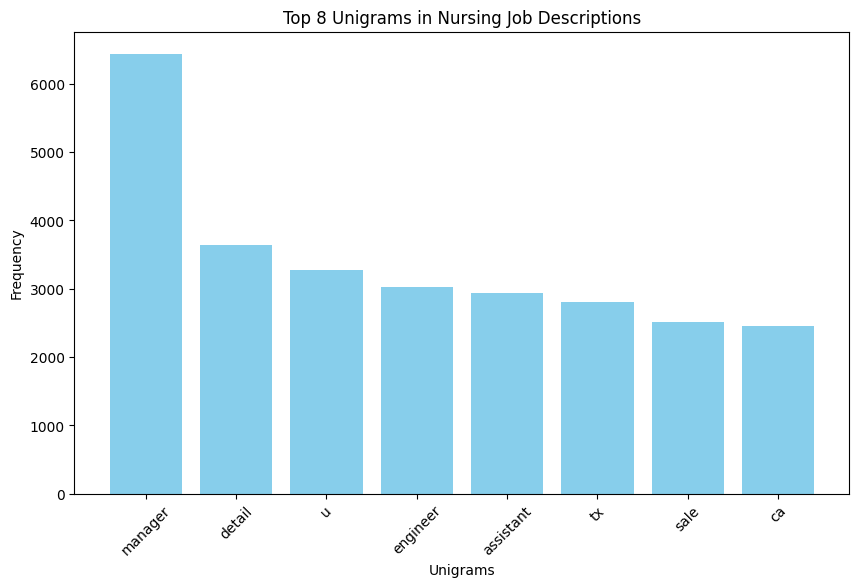

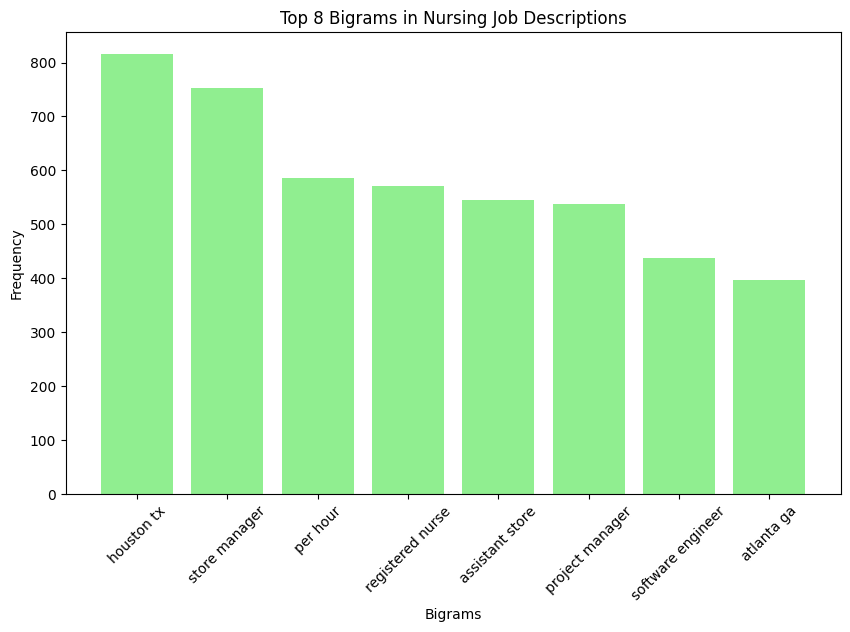

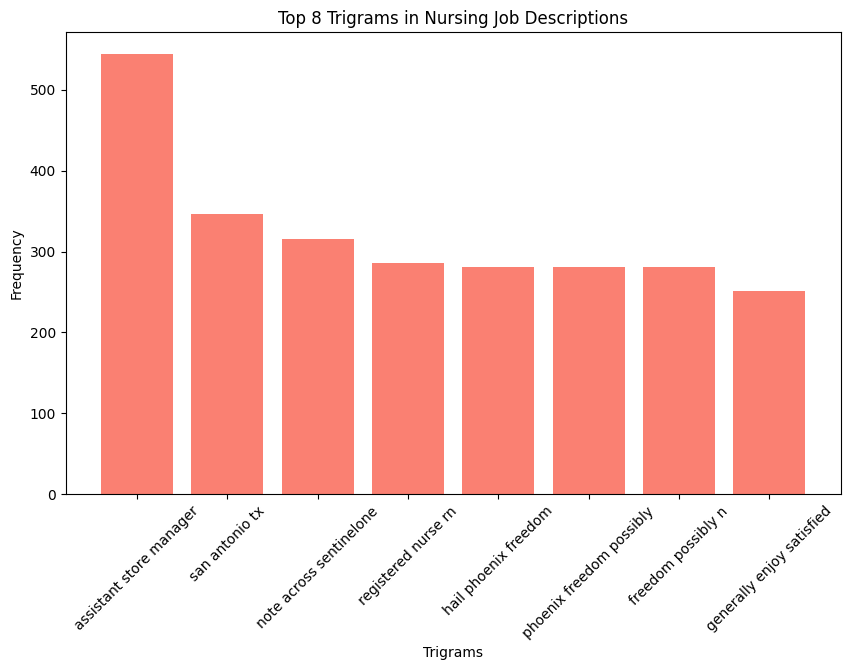

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import nltk

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset
data = pd.read_csv('/content/cleaned_data.csv')

# Define stop words and additional custom words
stop_words = set(stopwords.words('english'))
stop_words.update([
    "hiring", "job", "apply", "opportunity", "position", "work",
    "team", "company", "career", "new", "great", "exciting", "city",
    "state", "location", "click", "looking", "jobs", "role", "join",
    "nurses", "staff", "based", "nursing", "employment",'amp', 'big', 'best', 'come', 'would', 'like', 'find', 'need',
    'people', 'currently', 'company', 'learn', 'way', 'opportunity', 'team', 'detail','link', 'click', 'visit', 'information', 'new', 'join', 'u', 'today',
    'position', 'full', 'send', 'description', 'experience', 'please', 'cv','time', 'year', 'check','open','website','apply','interest','interested','interested','see','customer service','customer','service','following','opening'
])

# Function to clean, tokenize, and lemmatize text
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'http\S+|[^a-zA-Z\s]', '', text.lower())
    tokens = [word for word in text.split() if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply preprocessing to the 'cleaned_text' column
data['processed_tokens'] = data['cleaned_text'].apply(preprocess_text)

# Step 1: Generate N-grams and Count Frequencies
# Flatten the list of tokens for unigram counts
all_unigrams = [token for tokens in data['processed_tokens'] for token in tokens]

# Generate bigrams and trigrams
all_bigrams = [bigram for tokens in data['processed_tokens'] for bigram in ngrams(tokens, 2)]
all_trigrams = [trigram for tokens in data['processed_tokens'] for trigram in ngrams(tokens, 3)]

# Count the top 8 unigrams, bigrams, and trigrams
top_unigrams = Counter(all_unigrams).most_common(8)
top_bigrams = Counter(all_bigrams).most_common(8)
top_trigrams = Counter(all_trigrams).most_common(8)

# Step 2: Plot Bar Charts
# Unigrams Bar Chart
unigrams, uni_counts = zip(*top_unigrams)
plt.figure(figsize=(10, 6))
plt.bar(unigrams, uni_counts, color='skyblue')
plt.title('Top 8 Unigrams in Nursing Job Descriptions')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Bigrams Bar Chart
bigrams, bi_counts = zip(*top_bigrams)
bigrams = [' '.join(bigram) for bigram in bigrams]  # Join tuple pairs for display
plt.figure(figsize=(10, 6))
plt.bar(bigrams, bi_counts, color='lightgreen')
plt.title('Top 8 Bigrams in Nursing Job Descriptions')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Trigrams Bar Chart
trigrams, tri_counts = zip(*top_trigrams)
trigrams = [' '.join(trigram) for trigram in trigrams]  # Join tuple triplets for display
plt.figure(figsize=(10, 6))
plt.bar(trigrams, tri_counts, color='salmon')
plt.title('Top 8 Trigrams in Nursing Job Descriptions')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


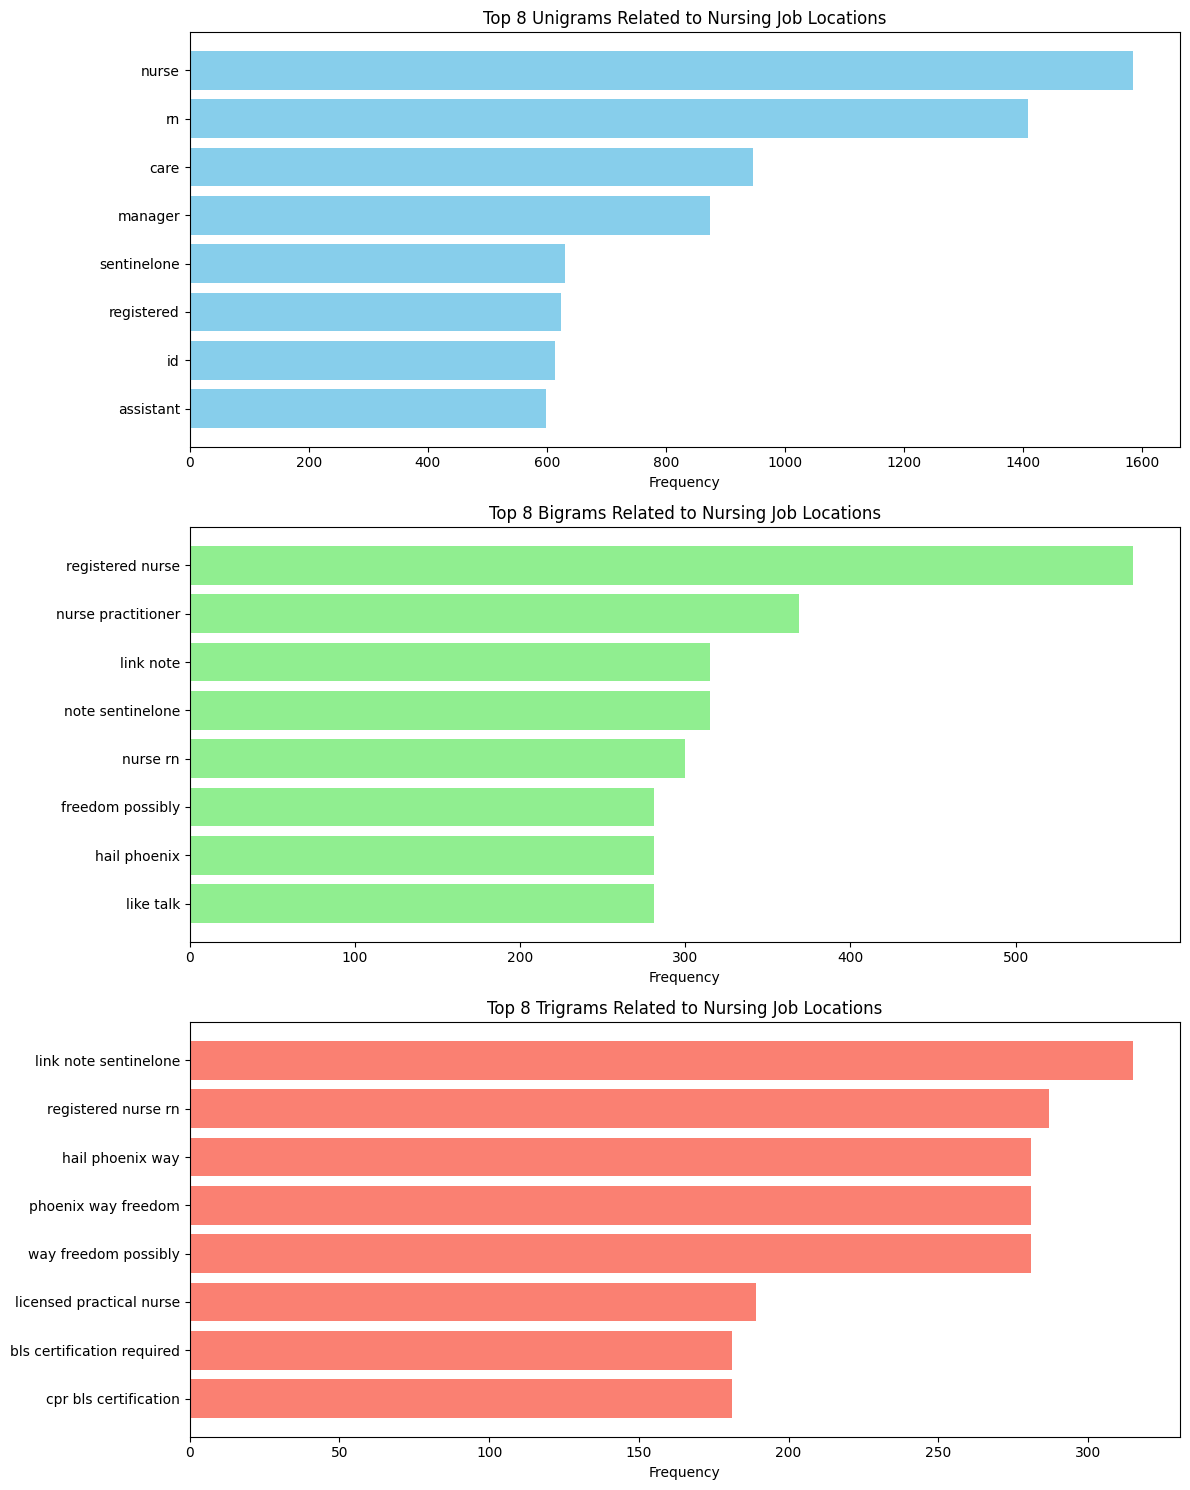

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Load the dataset
data = pd.read_csv('/content/cleaned_data.csv')

# Define keywords directly relevant to nursing and location
nursing_location_keywords = r'\bnurse\b|\bnursing\b|\brn\b|\blpn\b|\bhospital\b|\bclinic\b|\bcare\b|\bopportunity\b|\blocation\b|\bcity\b|\bstate\b|\bregion\b'

# Filter data for rows containing nursing and location keywords
filtered_data = data[data['cleaned_text'].str.contains(nursing_location_keywords, case=False, na=False)]

# Additional stopwords focused on research question context
research_specific_stopwords = {
    "hiring", "job", "apply", "team", "work", "company", "career", "description", "join", "nurses",
    "position", "employment", "provide", "opportunity", "offer", "experience", "please", "send", "state", "location", "city",'new','looking','time'
}

# Combine custom stop words with English stopwords
all_stopwords = list(research_specific_stopwords) + list(ENGLISH_STOP_WORDS) # Convert to list

# Function to extract top n-grams
def get_top_ngrams(corpus, ngram_range=(1, 1), top_n=8):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=all_stopwords)
    ngrams = vectorizer.fit_transform(corpus)
    ngram_counts = ngrams.toarray().sum(axis=0)
    ngram_names = vectorizer.get_feature_names_out()
    sorted_ngrams = sorted(zip(ngram_names, ngram_counts), key=lambda x: x[1], reverse=True)
    return sorted_ngrams[:top_n]

# Extract unigrams, bigrams, and trigrams relevant to the research question
top_unigrams = get_top_ngrams(filtered_data['cleaned_text'], ngram_range=(1, 1), top_n=8)
top_bigrams = get_top_ngrams(filtered_data['cleaned_text'], ngram_range=(2, 2), top_n=8)
top_trigrams = get_top_ngrams(filtered_data['cleaned_text'], ngram_range=(3, 3), top_n=8)

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Unigrams Bar Chart
unigrams, uni_counts = zip(*top_unigrams)
ax[0].barh(unigrams, uni_counts, color='skyblue')
ax[0].set_title('Top 8 Unigrams Related to Nursing Job Locations')
ax[0].set_xlabel('Frequency')
ax[0].invert_yaxis()

# Bigrams Bar Chart
bigrams, bi_counts = zip(*top_bigrams)
ax[1].barh(bigrams, bi_counts, color='lightgreen')
ax[1].set_title('Top 8 Bigrams Related to Nursing Job Locations')
ax[1].set_xlabel('Frequency')
ax[1].invert_yaxis()

# Trigrams Bar Chart
trigrams, tri_counts = zip(*top_trigrams)
ax[2].barh(trigrams, tri_counts, color='salmon')
ax[2].set_title('Top 8 Trigrams Related to Nursing Job Locations')
ax[2].set_xlabel('Frequency')
ax[2].invert_yaxis()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('/content/cleaned_data.csv')

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Define nursing-related keywords
nursing_keywords = r'\bnurse\b|\bregistered nurse\b|\brn\b|\blpn\b|\bnursing\b|\bcna\b'

# Create a new column to indicate the presence of nursing-related terms
df['Nursing Mention'] = df['cleaned_text'].str.contains(nursing_keywords, case=False, na=False)

# Filter data to include only rows with nursing mentions
nursing_mentions = df[df['Nursing Mention']]

# Extract the year from 'Timestamp' and count mentions per year
mentions_per_year = nursing_mentions['Timestamp'].dt.year.value_counts().sort_index()
mentions_per_year = mentions_per_year.rename_axis('Year').reset_index(name='Mentions Count')

# Create a bar chart using Plotly
fig = px.bar(
    mentions_per_year,
    x='Year',
    y='Mentions Count',
    title='Number of Nursing-related Mentions Per Year',
    labels={'Year': 'Year', 'Mentions Count': 'Number of Mentions'}
)

fig.update_layout(xaxis_title='Year', yaxis_title='Number of Mentions')
fig.show()


In [ ]:
# Install required libraries if not already installed
!pip install pyLDAvis gensim
!pip install nltk

import gensim
from gensim import corpora
import pyLDAvis.gensim as gensimvis
import pyLDAvis
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import re
import nltk

# Ensure nltk stopwords and lemmatizer resources are available
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
data = pd.read_csv('/content/cleaned_data.csv')

# Define stopwords relevant to nursing job analysis
stop_words = set(stopwords.words('english'))
stop_words.update([
    "hiring", "job", "apply", "opportunity", "position", "work",
    "team", "company", "career", "new", "great", "exciting",
    "link", "click", "looking", "jobs", "role", "join", "nurses"
])

# Modified preprocess_text function to handle non-string values
def preprocess_text(text):
    # Check if text is a string; if not, convert or handle as needed
    if not isinstance(text, str):
        # If text is not a string (e.g., float), convert it to a string
        # or handle it according to your specific requirements.
        # Here, we convert it to an empty string to avoid the error.
        text = str(text)

    # Convert text to lowercase, remove URLs and non-alphabet characters
    text = re.sub(r'http\S+|[^a-zA-Z\s]', '', text.lower())
    # Tokenize and remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    # Lemmatize each token
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply preprocessing to the 'cleaned_text' column
data['processed_text'] = data['cleaned_text'].apply(preprocess_text)

# Create dictionary and corpus needed for LDA
dictionary = corpora.Dictionary(data['processed_text'])
corpus = [dictionary.doc2bow(text) for text in data['processed_text']]

# Train an LDA model with specified number of topics
num_topics = 5  # Adjust based on dataset and desired detail level
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=3,
    random_state=42
)

# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()  # Enable notebook display for pyLDAvis
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)  # Prepare visualization
pyLDAvis.display(lda_vis)  # Display the visualization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 40.1 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Install required libraries if not already installed
!pip install pyLDAvis gensim

import pandas as pd
import gensim
from gensim import corpora
import pyLDAvis.gensim as gensimvis
import pyLDAvis
from nltk.corpus import stopwords
import re
import nltk

# Ensure nltk stopwords resource is available
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv('/content/cleaned_data.csv')

# Define stopwords focused on nursing job locations and remove irrelevant job terms
stop_words = set(stopwords.words('english'))
stop_words.update([
    "hiring", "job", "apply", "position", "team", "company", "career", "description", "join",
    "staff", "based", "employment", "fulltime", "parttime", "opportunity", "nurse", "nursing", "work",
    "day", "night", "shift", "service", "provide", "support", "offer", "experience", "details", "role"
])

# Define keywords related to nursing job opportunities and locations
nursing_location_keywords = r'\bnurse\b|\bnursing\b|\brn\b|\blpn\b|\bcna\b|\bhospital\b|\bclinic\b|\bcity\b|\bstate\b|\bregion\b|\blocation\b|\bcare\b|\bhealthcare\b'

# Filter data for rows with relevant keywords for nursing jobs and locations
filtered_data = data[data['cleaned_text'].str.contains(nursing_location_keywords, case=False, na=False)]

# Apply stop words filtering on preprocessed tokens
filtered_data['processed_text'] = filtered_data['cleaned_text'].apply(lambda x: [word for word in x.split() if word not in stop_words])

# Create dictionary and corpus needed for LDA
dictionary = corpora.Dictionary(filtered_data['processed_text'])
corpus = [dictionary.doc2bow(text) for text in filtered_data['processed_text']]

# Train LDA model with a focus on location-related themes
num_topics = 3  # Adjust based on dataset size and level of detail desired
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=5,
    random_state=42
)

# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()  # Enable notebook display for pyLDAvis
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)  # Prepare the visualization
pyLDAvis.display(lda_vis)  # Display the visualization


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-25-c7fea6640df1>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Install required libraries if not already installed
!pip install pyLDAvis gensim

import pandas as pd
import gensim
from gensim import corpora
import pyLDAvis.gensim as gensimvis
import pyLDAvis
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

# Ensure nltk stopwords are available
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv('/content/cleaned_data.csv')

# Define stopwords for job-related terms that aren't relevant to locations
stop_words = stopwords.words('english')
stop_words.extend([
    "hiring", "job", "apply", "position", "team", "work", "company", "career", "new", "great",
    "description", "join", "nurses", "provide", "opportunity", "offer", "experience", "please",
    "send", "state", "location", "city"
])

# Handle missing values in 'cleaned_text' before applying CountVectorizer
data['cleaned_text'] = data['cleaned_text'].fillna('')

# Extract bigrams and trigrams, with more restrictive vocabulary size for faster processing
# Reduced min_df to 2
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words=stop_words, max_features=3000, min_df=2)
ngrams = vectorizer.fit_transform(data['cleaned_text'])

# Define keywords related to nursing job opportunities and locations
nursing_location_keywords = r'\bnurse\b|\bnursing\b|\brn\b|\blpn\b|\bcna\b|\bhospital\b|\bclinic\b|\bcity\b|\bstate\b|\bregion\b|\blocation\b|\bcare\b|\bhealthcare\b'

# Filter data for rows with relevant keywords for nursing jobs and locations
filtered_data = data[data['cleaned_text'].str.contains(nursing_location_keywords, case=False, na=False)]

# Get the feature names (bigrams and trigrams)
ngram_features = vectorizer.get_feature_names_out()

# Instead of splitting by space, iterate over the extracted ngrams
tokenized_ngrams = [[ngram for ngram in ngram_features if ngram in doc] for doc in data['cleaned_text']]

# Create dictionary and corpus for LDA using the tokenized bigrams and trigrams
dictionary = corpora.Dictionary(tokenized_ngrams)
corpus = [dictionary.doc2bow(ngram) for ngram in tokenized_ngrams]

# Train LDA model with focus on n-grams
num_topics = 4  # Adjust based on dataset size and desired level of detail
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=2,  # Set passes for model refinement
    random_state=42
)

# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Install required libraries if not already installed
!pip install pyLDAvis gensim nltk

import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis  # Updated import for newer versions
import pyLDAvis
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv('/content/cleaned_data.csv')

# Initialize stop words and add custom job-related stopwords
stop_words = set(stopwords.words('english'))
stop_words.update([
    'hiring', 'job', 'amp', 'big', 'best', 'come', 'would', 'like', 'find', 'need',
    'people', 'currently', 'company', 'learn', 'way', 'opportunity', 'team', 'detail',
    'link', 'click', 'visit', 'information', 'new', 'join', 'u', 'today',
    'position', 'full', 'send', 'description', 'experience', 'please', 'cv',
    'apply', 'looking', 'candidate', 'role', 'vacancy', 'work', 'employment', 'part', 'time', 'year', 'check',
    'open', 'website', 'apply', 'interest', 'interested', 'see', 'customer service', 'customer', 'service',
    'following', 'opening'
])

# Step 1: Tokenize and Filter Tokens
df['tokens'] = df['cleaned_text'].apply(
    lambda text: [word for word in str(text).split() if word not in stop_words and len(word) > 1]
    if isinstance(text, str) else []
)

# Step 2: Create Dictionary and Corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Step 3: Train the Initial LDA Model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=3, random_state=42)

# Step 3a: Visualize the Initial LDA Model with pyLDAvis
try:
    lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)  # Prepare visualization for initial model
    pyLDAvis.display(lda_vis)  # Display the visualization for the initial model
except Exception as e:
    print(f"Display in notebook failed: {e}. Saving to 'lda_initial_model.html' instead.")
    pyLDAvis.save_html(lda_vis, 'lda_initial_model.html')
    print("Visualization saved to 'lda_initial_model.html'. Open this file in a browser to view.")

# Step 4: Identify Documents Most Related to Topic 7
topic_threshold = 0.5
topic_index = 6  # Zero-based index for Topic 7

# Filter documents where Topic 7 has a high contribution
topic_7_docs = [
    df['tokens'][i] for i, row in enumerate(lda_model[corpus])
    if len(row) > topic_index and row[topic_index][1] >= topic_threshold
]

# Step 5: Create New Dictionary and Corpus for Topic 7
topic_7_dictionary = corpora.Dictionary(topic_7_docs)
topic_7_corpus = [topic_7_dictionary.doc2bow(text) for text in topic_7_docs]

# Step 6: Train a New LDA Model on Topic 7 Documents
lda_model_topic_7 = LdaModel(corpus=topic_7_corpus, id2word=topic_7_dictionary, num_topics=5, passes=5, random_state=42)

# Step 6a: Visualize the LDA Model for Topic 7 Documents with pyLDAvis
try:
    lda_vis_topic_7 = gensimvis.prepare(lda_model_topic_7, topic_7_corpus, topic_7_dictionary)  # Prepare visualization for Topic 7
    pyLDAvis.display(lda_vis_topic_7)  # Display the visualization for Topic 7 model
except Exception as e:
    print(f"Display in notebook failed: {e}. Saving to 'lda_topic_7_model.html' instead.")
    pyLDAvis.save_html(lda_vis_topic_7, 'lda_topic_7_model.html')
    print("Visualization saved to 'lda_topic_7_model.html'. Open this file in a browser to view.")

# Step 7: Display the Subtopics
for idx, topic in lda_model_topic_7.print_topics(num_topics=5, num_words=10):
    print(f"Subtopic {idx + 1}: {topic}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Subtopic 1: 0.017*"engineer" + 0.017*"exciting" + 0.012*"quality" + 0.011*"creative" + 0.011*"great" + 0.011*"levels" + 0.010*"ia" + 0.010*"roles" + 0.010*"materials" + 0.010*"projects"
Subtopic 2: 0.030*"roles" + 0.020*"jobs" + 0.012*"still" + 0.011*"mi" + 0.011*"recruiting" + 0.010*"alert" + 0.009*"working" + 0.009*"opportunities" + 0.008*"searching" + 0.007*"talented"
Subtopic 3: 0.017*"opportunities" + 0.017*"great" + 0.014*"senior" + 0.010*"working" + 0.009*"coordinator" + 0.009*"page" + 0.008*"help" + 0.008*"challenges" + 0.008*"services" + 0.008*"adventure"
Subtopic 4: 0.029*"know" + 0.021*"anyone" + 0.020*"openings" + 0.019*"career" + 0.018*"dm" + 0.017*"jobs" + 0.017*"take" + 0.016*"look" + 0.015*"servicenow" + 0.012*"current"
Subtopic 5: 0.047*"opportunities" + 0.026*"jobs" + 0.023*"right" + 0.021*"amazing" + 0.020*"want" + 0.017*"follow" + 0.016*"futuresandcareers" + 0.016*"heard" + 0.012*"manager" + 0.011*"available"


In [ ]:
# Install required libraries if not already installed
!pip install pyLDAvis gensim nltk

import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis  # Updated import for newer versions
import pyLDAvis
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv('/content/cleaned_data.csv')

# Initialize stop words and add custom job-related stopwords
stop_words = set(stopwords.words('english'))
stop_words.update([
    'hiring', 'job', 'amp', 'big', 'best', 'come', 'would', 'like', 'find', 'need',
    'people', 'currently', 'company', 'learn', 'way', 'opportunity', 'team', 'detail',
    'link', 'click', 'visit', 'information', 'new', 'join', 'u', 'today',
    'position', 'full', 'send', 'description', 'experience', 'please', 'cv',
    'apply', 'looking', 'candidate', 'role', 'vacancy', 'work', 'employment', 'part', 'time', 'year', 'check',
    'open', 'website', 'apply', 'interest', 'interested', 'see', 'customer service', 'customer', 'service',
    'following', 'opening'
])

# Step 1: Tokenize and Filter Tokens
df['tokens'] = df['cleaned_text'].apply(
    lambda text: [word for word in str(text).split() if word not in stop_words and len(word) > 1]
    if isinstance(text, str) else []
)

# Step 2: Create Dictionary and Corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Step 3: Train the Initial LDA Model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=3, random_state=42)

# Step 3a: Visualize the Initial LDA Model with pyLDAvis and Save to HTML
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(lda_vis, 'lda_initial_model.html')
print("Initial LDA model visualization saved as 'lda_initial_model.html'.")

# Download the HTML file in Google Colab
from google.colab import files
files.download('lda_initial_model.html')

# Step 4: Identify Documents Most Related to Topic 7
topic_threshold = 0.5
topic_index = 6  # Zero-based index for Topic 7

# Filter documents where Topic 7 has a high contribution
topic_7_docs = [
    df['tokens'][i] for i, row in enumerate(lda_model[corpus])
    if len(row) > topic_index and row[topic_index][1] >= topic_threshold
]

# Step 5: Create New Dictionary and Corpus for Topic 7
topic_7_dictionary = corpora.Dictionary(topic_7_docs)
topic_7_corpus = [topic_7_dictionary.doc2bow(text) for text in topic_7_docs]

# Step 6: Train a New LDA Model on Topic 7 Documents
lda_model_topic_7 = LdaModel(corpus=topic_7_corpus, id2word=topic_7_dictionary, num_topics=5, passes=5, random_state=42)

# Step 6a: Visualize the LDA Model for Topic 7 Documents with pyLDAvis and Save to HTML
lda_vis_topic_7 = gensimvis.prepare(lda_model_topic_7, topic_7_corpus, topic_7_dictionary)
pyLDAvis.save_html(lda_vis_topic_7, 'lda_topic_7_model.html')
print("Topic 7 LDA model visualization saved as 'lda_topic_7_model.html'.")

# Download the HTML file for Topic 7 visualization in Google Colab
files.download('lda_topic_7_model.html')

# Step 7: Display the Subtopics
for idx, topic in lda_model_topic_7.print_topics(num_topics=5, num_words=10):
    print(f"Subtopic {idx + 1}: {topic}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Initial LDA model visualization saved as 'lda_initial_model.html'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Topic 7 LDA model visualization saved as 'lda_topic_7_model.html'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Subtopic 1: 0.017*"engineer" + 0.017*"exciting" + 0.012*"quality" + 0.011*"creative" + 0.011*"great" + 0.011*"levels" + 0.010*"ia" + 0.010*"roles" + 0.010*"materials" + 0.010*"projects"
Subtopic 2: 0.030*"roles" + 0.020*"jobs" + 0.012*"still" + 0.011*"mi" + 0.011*"recruiting" + 0.010*"alert" + 0.009*"working" + 0.009*"opportunities" + 0.008*"searching" + 0.007*"talented"
Subtopic 3: 0.017*"opportunities" + 0.017*"great" + 0.014*"senior" + 0.010*"working" + 0.009*"coordinator" + 0.009*"page" + 0.008*"help" + 0.008*"challenges" + 0.008*"services" + 0.008*"adventure"
Subtopic 4: 0.029*"know" + 0.021*"anyone" + 0.020*"openings" + 0.019*"career" + 0.018*"dm" + 0.017*"jobs" + 0.017*"take" + 0.016*"look" + 0.015*"servicenow" + 0.012*"current"
Subtopic 5: 0.047*"opportunities" + 0.026*"jobs" + 0.023*"right" + 0.021*"amazing" + 0.020*"want" + 0.017*"follow" + 0.016*"futuresandcareers" + 0.016*"heard" + 0.012*"manager" + 0.011*"available"
